In [1]:
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle

In [2]:
df=pd.read_csv('boston.csv')#header默认值为0，取第1行作为表头
print (df.shape) #(506, 13)

(506, 13)


In [3]:
x_data=df.copy()
del x_data['MEDV']

#归一化：考虑不同特征值取值范围大小的影响
x_data=(x_data-x_data.min())/(x_data.max()-x_data.min())
print (x_data.head()) #(506,12) DataFrame

y_data=df[['MEDV']]
print (y_data.head()) #(506,1)  DataFrame

       CRIM   ZN     INDUS   CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        RAD       TAX   PTRATIO     LSTAT  
0  0.000000  0.208015  0.287234  0.089680  
1  0.043478  0.104962  0.553191  0.204470  
2  0.043478  0.104962  0.553191  0.063466  
3  0.086957  0.066794  0.648936  0.033389  
4  0.086957  0.066794  0.648936  0.099338  
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


In [4]:
x=tf.placeholder(tf.float32,shape=[None,12],name='X')               #(?, 12)  <dtype: 'float32'>
y=tf.placeholder(tf.float32,shape=[None,1],name='Y')                # (?, 1)

with tf.name_scope('Model'):
    w=tf.Variable(tf.random.normal([12,1],dtype=tf.float32),name='W') #(12,1) <dtype: 'float32_ref'>
    b=tf.Variable(0.0,name='b')                                     #()
    def model(x,w,b):
        #之所以特别给w设置dtype=tf.float32是因为tf.matmul中要求x和w的类型要一致，如果不设的话w的类型是tf.float64
        return tf.matmul(x,w)+b 
    pred=model(x,w,b)                                               #(?,1)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
epochs=50
lr=0.05

In [7]:
with tf.name_scope('LossFunction'):
    loss_function=tf.reduce_mean(tf.square(y-pred))                 #()

optimizer=tf.train.GradientDescentOptimizer(lr).minimize(loss_function)

In [8]:
#【创建会话】
sess=tf.Session()
init=tf.global_variables_initializer()

In [10]:
#【⚠️创建一个操作，用于记录损失值loss，在TensorBoard的SCALAR栏可见】
sum_loss_op=tf.summary.scalar('loss',loss_function)

#【⚠️将所有需要记录摘要日志的文件合并，方便一次性写入】
merged=tf.summary.merge_all()

In [11]:
#【启动会话】
sess.run(init)

In [12]:
#【⚠️设置日志存储目录】
logdir='/Users/zhangying/Desktop/tf-exercise/exercise-7-多元变量线性回归'

#【⚠️创建摘要的文件写入器 FileWriter 】
writer=tf.summary.FileWriter(logdir,sess.graph)

TensorBoard查看计算图

<img src='./graph.png'>

TensorBoard查看loss
🤔️每个epoch加入的是最后一个样本的loss？

<img src='./loss.png'>

第1轮 w值[[ -2.5704377 ]
 [  2.198556  ]
 [ -2.1988368 ]
 [ -0.14089829]
 [  3.5627675 ]
 [ 17.255518  ]
 [ -1.1399224 ]
 [  0.34230417]
 [  2.8784835 ]
 [ -0.79035515]
 [ -0.08721739]
 [-11.489393  ]] b值12.0227 loss average31.6315
第2轮 w值[[ -4.486678  ]
 [  1.5379506 ]
 [ -0.43368915]
 [  4.9429297 ]
 [  1.141949  ]
 [ 23.544283  ]
 [  1.7932264 ]
 [ -4.2339854 ]
 [  3.1392045 ]
 [ -2.5174024 ]
 [ -5.106524  ]
 [-16.652645  ]] b值19.3974 loss average35.5926
第3轮 w值[[ -5.4840217 ]
 [  2.6434484 ]
 [ -0.570555  ]
 [  2.3629115 ]
 [ -3.5745757 ]
 [ 24.143171  ]
 [  0.92130876]
 [ -6.9491043 ]
 [  2.5474274 ]
 [ -4.703374  ]
 [ -7.498224  ]
 [-17.97494   ]] b值21.4914 loss average33.7751
第4轮 w值[[ -5.642196  ]
 [  2.5688615 ]
 [  0.08644889]
 [  6.156515  ]
 [ -5.3146095 ]
 [ 23.352625  ]
 [  1.2823979 ]
 [ -9.856724  ]
 [  4.0218596 ]
 [ -4.0426984 ]
 [ -6.763589  ]
 [-19.784712  ]] b值23.3035 loss average30.8085
第5轮 w值[[ -7.1690226 ]
 [  3.9744089 ]
 [  0.3087249 ]
 [  2.4396145 ]
 [ -6.123083  

第37轮 w值[[-11.124926  ]
 [  6.265869  ]
 [  0.97064936]
 [  1.9838507 ]
 [ -9.423657  ]
 [ 18.429527  ]
 [ -0.3195419 ]
 [-16.167381  ]
 [  6.7056227 ]
 [ -5.583347  ]
 [ -9.486314  ]
 [-19.06103   ]] b值29.8252 loss average30.0739
第38轮 w值[[-11.646366  ]
 [  4.6464777 ]
 [  1.1753724 ]
 [  3.310752  ]
 [ -9.39751   ]
 [ 18.655634  ]
 [  0.57123524]
 [-16.403242  ]
 [  5.0773287 ]
 [ -6.9085546 ]
 [ -8.851057  ]
 [-19.022667  ]] b值30.6429 loss average28.8462
第39轮 w值[[-10.749032  ]
 [  3.9639904 ]
 [ -0.2556166 ]
 [  3.4763355 ]
 [ -9.782552  ]
 [ 19.090961  ]
 [  0.15545647]
 [-16.475     ]
 [  6.703825  ]
 [ -6.480888  ]
 [ -8.860835  ]
 [-20.44493   ]] b值30.7510 loss average29.5099
第40轮 w值[[-11.030487  ]
 [  4.369492  ]
 [  0.15946838]
 [  0.8756933 ]
 [-10.139911  ]
 [ 18.811417  ]
 [  0.4889333 ]
 [-16.493546  ]
 [  5.147242  ]
 [ -7.469652  ]
 [ -8.425269  ]
 [-18.824476  ]] b值30.6556 loss average28.2494
第41轮 w值[[-11.969607 ]
 [  3.7016525]
 [  1.6054518]
 [  3.546224 ]
 [ -8.000881 

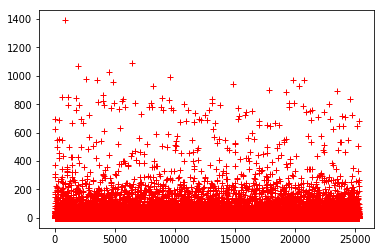

In [13]:
loss_list=[]
for epoch in range(epochs):
    loss_sum=0
    for i in range(len(x_data)):
        xs=x_data.iloc[i:i+1]
        ys=y_data.iloc[i:i+1]
        
        #【⚠️运行sum_loss_op，记录的损失值被写入写入器】
        #每个epoch加入的是最后一个样本的loss？
        _,summary_str,loss=sess.run([optimizer,sum_loss_op,loss_function],feed_dict={x:xs,y:ys})
        writer.add_summary(summary_str,epoch)
        
        loss_list.append(loss)
        loss_sum+=loss

    loss_average=loss_sum/len(x_data)
    wtemp=sess.run(w)
    btemp=b.eval(session=sess)
    print ('第%d轮'%(epoch+1),'w值{}'.format(wtemp),'b值%.4f'%btemp,'loss average%.4f'%loss_average)
    
    #打乱数据顺序
    x_data,y_data=shuffle(x_data,y_data) 

plt.plot(loss_list,'r+')

In [14]:
n=np.random.randint(506)
print (n)

#掉了好几次同一个坑辣!要写成x_data.iloc[n:n+1]不能是x_data[n]
x_test=x_data.iloc[n:n+1]                               #DataFrame(1,12)
prediction=sess.run(pred,feed_dict={x:x_test})          #ndarray  (1,1)
print ('预测值：%f'%prediction)

target=y_data.iloc[n:n+1]                               #DataFrame(1,1)
# print (target.values)                                 #eg. [[24.5]]
print ('标签值：%f'%target.values[0][0])

2
预测值：11.644896
标签值：13.100000


【打乱DataFrame数据顺序的方法】
法1:
from sklearn.utils import shuffle
df = shuffle(df)
法2:
df=df.sample(frac=1) #打乱后，index是原数据的index，所以是无序的
df=df.sample(frac=1).reset_index(drop=True)  #打乱后，index重新排序，所以是从0开始的有序的
法3:
df.iloc[np.random.permutation(len(df))]
